# 3. Plotting for Exploratory data analysis (EDA)

# (3.1) Basic Terminology

* What is EDA?
* Data-point/vector/Observation
* Data-set.
* Feature/Variable/Input-variable/Dependent-varibale
* Label/Indepdendent-variable/Output-varible/Class/Class-label/Response label
* Vector: 2-D, 3-D, 4-D,.... n-D

Q. What is a 1-D vector: Scalar



# (3.12) Exercise:

1. Download Haberman Cancer Survival dataset from Kaggle. You may have to create a Kaggle account to donwload data. (https://www.kaggle.com/gilsousa/habermans-survival-data-set)
2. Perform a similar alanlaysis as above on this dataset with the following sections:
* High level statistics of the dataset: number of points, numer of   features, number of classes, data-points per class.
* Explain our objective. 
* Perform Univaraite analysis(PDF, CDF, Boxplot, Voilin plots) to understand which features are useful towards classification.
* Perform Bi-variate analysis (scatter plots, pair-plots) to see if combinations of features are useful in classfication.
* Write your observations in english as crisply and unambigously as possible. Always quantify your results.

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


cancer = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/cancer.csv")



/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/usr/local/lib/python3.7/dist-packages/numpy/lib/histograms.py:905: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


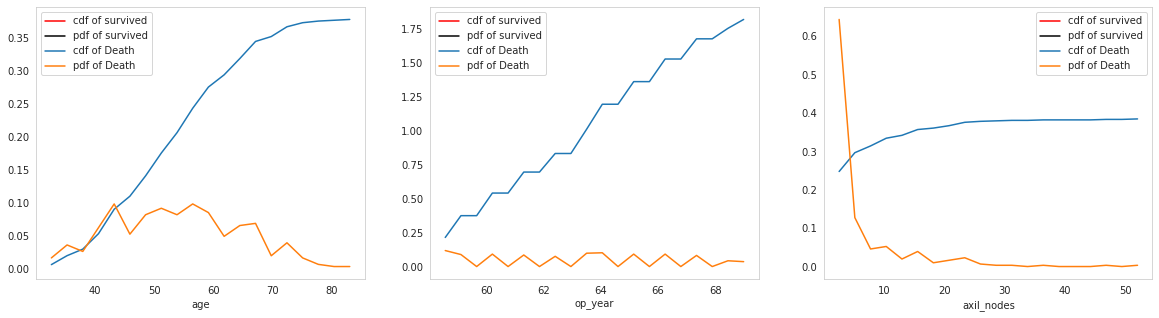

In [80]:
#univariate analysis
cancer["surv_status"] = cancer["surv_status"].apply(lambda x: "Survived" if x == 1 else "Died")  # replace 1 with survived and 0 with died 

Survived= cancer.loc[cancer["surv_status"]== "Survived"]
Died = cancer.loc[cancer["surv_status"]=="Died"]


plt.figure(figsize=(20,5))
i=1
for state in (list(cancer.columns)[:-1]):    #  [:-1]  select all except last element in cancer data
#survived
    plt.subplot(1,3,i)
    Counts , bin_edges = np.histogram(Survived[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of survived",color="red")
    plt.plot(bin_edges[1:],pdf,label="pdf of survived",color="black")

#Death
    Counts , bin_edges = np.histogram(Died[state],bins=20,density=True)
    pdf=Counts/sum(Counts)
    cdf = np.cumsum(Counts)
    plt.plot(bin_edges[1:],cdf,label="cdf of Death")
    plt.plot(bin_edges[1:],pdf,label="pdf of Death")
    plt.xlabel(state)
    plt.grid()
    plt.legend()
    i+=1
plt.show()



********************************* Box Plot ***********************************************


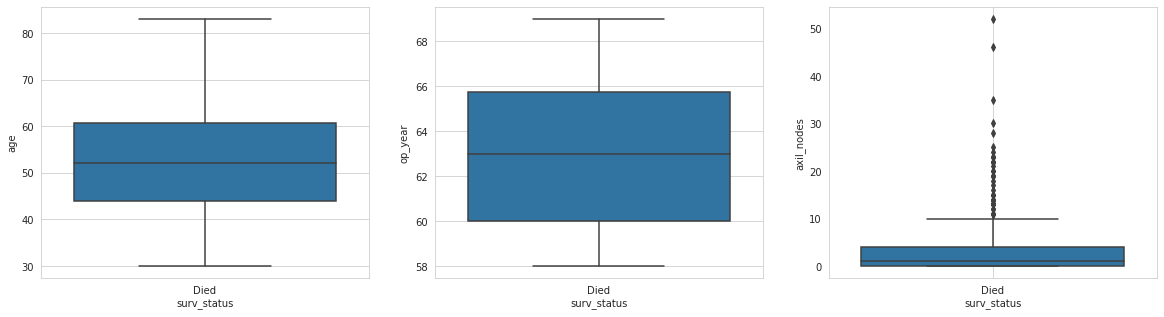

*********************************** Violin Plot ******************************************


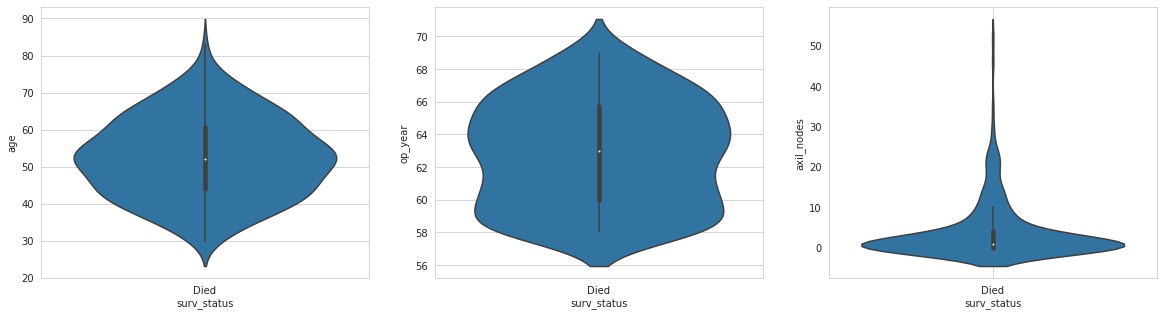

In [81]:


# Box_plot
print("********************************* Box Plot ***********************************************")
plt.figure(figsize=(20,5))
j=1
for features in (list(cancer.columns)[:-1]):  
    plt.subplot(1,3,j); j+=1 
    sns.boxplot(x= 'surv_status',y= features,data=cancer)
plt.grid()    
plt.show()

print("*********************************** Violin Plot ******************************************")
# violin_plot
plt.figure(figsize=(20,5))
k=1
for features in (list(cancer.columns)[:-1]):  
    plt.subplot(1,3,k); k+=1 
    sns.violinplot(x= 'surv_status',y= features,data=cancer)
plt.grid()
plt.show()



In [ ]:
'''
#Univaraite analysis
Observations:

1) The dataset has 4 features/variable and 305 data points.

2) The dataset has a collection of data of patient aged between 30-83 years those who had undergone cancer surgery in year 1958-1969.

3) Almost 75% of the patient had 0-4 axil nodes where 25% of them had 0 node and very few had up to 52 axil nodes.

4) The dataset has 224 datapoint labeled as "1" and 81 datapoint labeled as "2" viz.,Surv_status:"1=Survived(the patient survived 5 years or longer)", "2=Died(the patient died within 5 year)"

5) The dataset is an imbalance dataset.(w.r.t. obs.point(4)).


6) Patient with age between age 32-36 has definitly survived the operation and pataient aged 77-85 has definitly not survived the operation.

7) No insight of the patient survival status can be drawn form the year of operation as the data for both the case are evenly distrubuted 
along the year of operations. Excapt the patient who had undergone the surgery between 1961-1965 has slightly higher probablity of survival.

8) Also it has been seen that the patient with axil nodes <22 has has better probability of survival and Patient with 0-2 axil node are more likely to survive.
'''

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


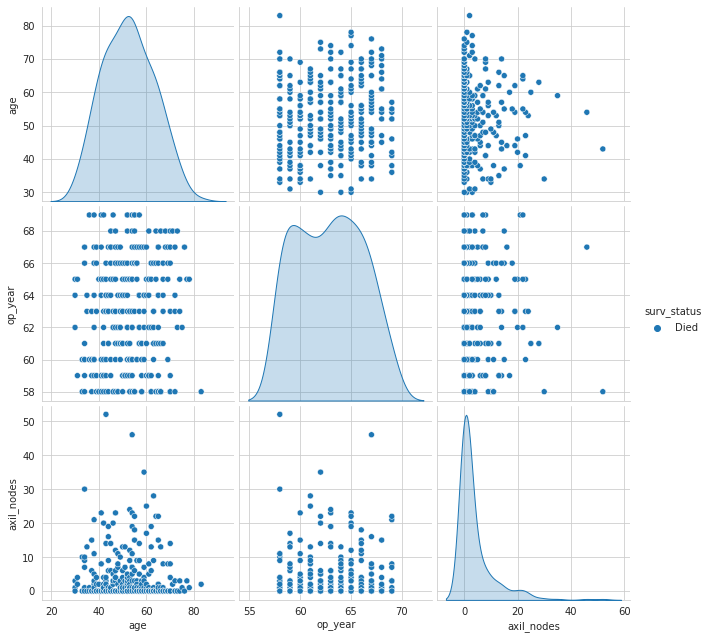

In [82]:
#Pair Plot
cancer['surv_status'] = cancer['surv_status'].astype('category')
plt.close();
sns.set_style("whitegrid");
sns.pairplot(cancer, hue="surv_status",vars = ["age","op_year","axil_nodes"], size = 3)
plt.show()

In [ ]:
'''
#bivariate observations
Observations:

The data are highly mixed up, none of the variable-pairs can help us find linearly separable
 clusters hence we can't find "lines" and "if-else" conditions to build a simple model to classify the survive status of the patient.
'''